## Universidad de Buenos Aires
## Deep Learning - Examen, Agosto 2023



## Ejercicio 1



Dada la siguiente función:

$$
f(x,y) = (1.5 - x + xy)^2 + (2.25-x+xy^2)^2 + (2.625 -x + xy^3)^2
$$


Encontrar el punto donde la función es mínima y el valor de dicho mínimo:

a. Utilizando SGD y cálculo de gradiente con regla de la cadena.

Para encontrar el punto donde la función $f(x,y)$ es mínima utilizando el método del descenso de gradiente estocástico (SGD) y el cálculo de gradiente con la regla de la cadena, necesitamos calcular las derivadas parciales de $f(x,y)$ con respecto a $x$ e $y$ y luego actualizar $x$ e $y$ iterativamente utilizando el gradiente y un factor de aprendizaje.

La función que queremos minimizar es:
$$
f(x,y) = (1.5 - x + xy)^2 + (2.25-x+xy^2)^2 + (2.625 -x + xy^3)^2
$$

Paso 1: Calculamos las derivadas parciales de la función con respecto a $x$ e $y$ utilizando la regla de la cadena:

$$
\frac{\partial f}{\partial x} = 2(1.5 - x + xy)(y-1)+2(2.25-x+xy^2)(y^2-1)+2(2.625 -x + xy^3)(y^3-1) =
$$

$$
= (3y-4xy+2xy^2+2x-3)+(4.5y^2-2xy^2+2xy^4-4.5+2x-2xy^2)+(5.25y^3-2xy^3+2xy^6-5.25+2x-2xy^3) =
$$

$$
= 2x(y^6+y^4-2y^3-y^2-2y+3)+5.25y^3+4.5y^2+3y-12.75
$$

$$
\frac{\partial f}{\partial y} = 2(1.5 - x + xy)x+2(2.25-x+xy^2)(2xy)+2(2.625 -x + xy^3)(3xy^2) =
$$

$$
= 2x(1.5 - x + xy)+4xy(2.25-x+xy^2)+6xy^2(2.625 -x + xy^3)
$$

Paso 2: Inicializamos valores para $x$, $y$ y el factor de aprendizaje $\alpha$. A partir de estos valores, iteramos actualizando $x$ e $y$ en función de las derivadas parciales:

$$
x_{t+1} = x_{t} - \alpha \times \frac{\partial f}{\partial x}\bigg|_{x=x_t, y=y_t}
$$

$$
y_{t+1} = y_{t} - \alpha \times \frac{\partial f}{\partial y}\bigg|_{x=x_t, y=y_t}
$$

Repetimos estos pasos hasta que los valores de $x$ e $y$ converjan a un mínimo o se alcance un número máximo de iteraciones.

Por ejemplo, si se inicializan $x$ e $y$ en valores de cero con un $\alpha = 0.001$:

Iteración 1:

$$
x_{t_1} = 0 - 0.001 \times (-12.75) = 0.01275
$$

$$
y_{t_1} = 0 - 0.001 \times 0 = 0
$$

Iteración 2:

$$
x_{t_2} = 0 - 0.001 \times [2(0.01275)(3)-12.75] = 0 - 0.001 \times -12.6735 = 0.0126735
$$

$$
y_{t_2} = 0 - 0.001 \times [2(0.01275)(1.5 - (0.01275))] = 0 - 0.001 \times 0.037924875 = -0.000037924875
$$

b. Utilizando SGD y pytorch.

El código a continuación utiliza el tensor x e y de PyTorch para realizar el descenso de gradiente. 

In [21]:
import torch

# Definir la función
def f(x, y):
    return (1.5 - x + x*y)**2 + (2.25 - x + x*(y**2))**2 + (2.625 - x + x*(y**3))**2

# Inicializar valores de x e y
x = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([0.0], requires_grad=True)

# Tasa de aprendizaje
alpha = 0.001

# Número de iteraciones
num_iterations = 10000

# Descenso de gradiente
for _ in range(num_iterations):
    loss = f(x, y) # Calcular el valor de la función de pérdida
    loss.backward()  # Calcular los gradientes
    
    # Actualizar los valores de x e y
    with torch.no_grad():
        x -= alpha * x.grad
        y -= alpha * y.grad
        # Reiniciar los gradientes
        x.grad.zero_()
        y.grad.zero_()

# Imprimir el resultado
print("Resultado utilizando PyTorch:")
print("Valor mínimo:", loss.item())
print("Coordenadas (x, y):", x.item(), y.item())

Resultado utilizando PyTorch:
Valor mínimo: 5.719094042433426e-05
Coordenadas (x, y): 2.9813029766082764 0.49529513716697693


## Ejercicio 2

Si tiene una imagen a procesar de 1024x720x3 y desea aplicar en cascada, 2 capas de convolución, seguido por una capa de activación y una de pooling,  con las siguientes características:

*Conv1:*
* tamaño kernel = 7x7
* padding = 2
* stride = 1
* número de kernel = 16

*Conv2:*
* tamaño kernel = 5x5
* padding = 0
* stride = 1
* número de kernel = 32

*activación*
* Tanh()

*pooling*
* tamaño pooling = 5x5
* padding pooling = 0
* stride pooling = 5

a) ¿Cual es el tamaño final de la salida y cuantos canales tiene?

Para calcular el tamaño y el número de canales de la salida después de aplicar las capas de convolución, activación y pooling en cascada, podemos seguir estos pasos: 

Capa Conv1: El tamaño de salida después de esta capa se calcula utilizando la fórmula:

$$
Tamaño\ de\ salida = \frac{Tamaño\ entrada + 2 \times Padding - Tamaño\ kernel}{Stride} +1
$$

Dado el tamaño de entrada $1024 \times 720 \times 3$ (ancho x alto x canales) y los datos proporcionados en el enunciado, se calcula el tamaño salida después de Conv1:

$$
Ancho = \frac{1024 + 2 * 2 - 7}{1} +1 =1022
$$

$$
Alto = \frac{720 + 2 * 2 - 7}{1} +1 = 718
$$

$$
Tamaño\ de\ salida = 1022 \times 718 \times 16
$$

Capa Conv2: Dado el tamaño de entrada (salida de Conv1) $1022 \times 718 \times 16$ y los datos proporcionados en el enunciado, se calcula el tamaño salida después de Conv2:

$$
Ancho = \frac{1022 + 2 * 0 - 5}{1} +1 = 1018
$$

$$
Alto = \frac{718 + 2 * 0 - 5}{1} +1 = 714
$$

$$
Tamaño\ de\ salida = 1018 \times 714 \times 32
$$​

Capa de activación: La función de activación Tanh() no afecta las dimensiones ni el número de canales, ya que la función de activación se aplica elemento por elemento en cada canal.

Capa de pooling: Dado el tamaño de entrada (salida de Conv2) $1018 \times 714 \times 32$ y los datos proporcionados en el enunciado, se calcula el tamaño salida después del pooling:

$$
Ancho = \frac{1018 + 2 * 0 - 5}{5} +1 = 203
$$

$$
Alto = \frac{714 + 2 * 0 - 5}{5} +1 = 142
$$

$$
Tamaño\ de\ salida = 203 \times 142 \times 32
$$

Después de aplicar las 2 capas de convolución, la activación (Tanh) y el pooling, el tamaño final de la salida es $203 \times 142 \times 32$.

El código presentado a continuación confirma estos resultados.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        
        # Capas de convolución
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=7, padding=2, stride=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=0, stride=1)
        
        # Capa de activación
        self.activation = nn.Tanh()
        
        # Capa de pooling
        self.pooling = nn.MaxPool2d(kernel_size=5, padding=0, stride=5)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.activation(x)
        x = self.conv2(x)
        x = self.activation(x)
        x = self.pooling(x)
        return x

# Crear una instancia de la red
model = CustomCNN()

# Crear una imagen de ejemplo 
input_image = torch.rand(1, 3, 1024, 720)

# Pasar la imagen a través de la red
output = model(input_image)

# Imprimir la forma del tensor de salida
output_shape = output.shape
print("Tamaño de la salida del modelo:", output_shape)

Tamaño de la salida del modelo: torch.Size([1, 32, 203, 142])


b) Si tiene que conectar esa salida a una `fully_connected` para clasificar 3 clases ¿que tamaño debe tener?

Después de todas las operaciones anteriores, la salida tiene un tamaño de $203 \times 142 \times 32$. Para conectar esta salida a una capa totalmente conectada (fully connected), primero debemos aplanarla en un vector unidimensional. El tamaño del vector será el producto del tamaño de las dimensiones espaciales y el número de canales:
$$
Tamaño\ del\ vector = 203 \times 142 \times 32 = 922432
$$
Por lo tanto, el tamaño de entrada de la fully connected debe ser 922432 para conectarlo correctamente a la fully connected que realizará la clasificación en 3 clases. Esto garantiza que cada elemento en la salida se conecte con una neurona en la capa fully connected, lo que permite que la red neuronal aprenda patrones y características para la clasificación.

In [3]:
# Definir la clase FullyConnectedClassifier 
class FullyConnectedClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(FullyConnectedClassifier, self).__init__()
        
        self.fc = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        x = self.fc(x)
        return x

# Tamaño necesario para la capa fully connected
input_fc_size = output_shape[1] * output_shape[2] * output_shape[3]

# Crear una instancia del modelo FullyConnectedClassifier
classifier_model = FullyConnectedClassifier(input_fc_size, num_classes=3)

# Pasar la salida del modelo CustomCNN a través del modelo FullyConnectedClassifier
classification_output = classifier_model(output.view(-1, input_fc_size))

# Imprimir la forma del tensor de salida de la clasificación
print("Tamaño necesario para la capa fully connected:", input_fc_size)
print("Forma de la salida de la clasificación:", classification_output.shape)

Tamaño necesario para la capa fully connected: 922432
Forma de la salida de la clasificación: torch.Size([1, 3])


## Ejercicio 3




Para la siguiente red neuronal recurrente, se pide expresar las ecuaciones "*unfolded*" de la salida de la misma y de sus estados ocultos, si el vector de entrada son 3 muestras secuenciadas de la variable $x(t)$.

![b](https://drive.google.com/uc?export=view&id=1Fz46GTK7Oy_w5OEgwLCLfHFMr7b6-AnL)




Ecuaciones de la RNN:

$$ \hat{y}(t) = w_{h1y} * h1(t) + w_{h2y} * h2(t) + by$$

$$ h1(t) = w_{xh1} * x(t) + w_{h1h1} * h1(t-1) + w_{h2h1} * h2(t-1)+ bh1$$
$$ h2(t) = w_{xh2} * x(t) + w_{h2h2} * h2(t-1) + w_{h1h2} * h1(t-1)+ bh2 $$

Para expresar las ecuaciones "unfolded" de la salida y los estados ocultos de la red neuronal recurrente (RNN) cuando se le proporcionan 3 muestras secuenciadas de la variable $x(t)$, podemos seguir el flujo de la red en cada paso. Primero, inicializamos los estados ocultos $h1$ y $h2$ en $t=0$ con algún valor apropiado $h1(t_0)$ y $h2(t_0)$. Asumiendo que las muestras secuenciales son $x(t_1)$, $x(t_2)$ y $x(t_3)$, las ecuaciones "unfolded" para la salida y los estados ocultos de la RNN serían las siguientes:

Paso 1: $t=t_1$ 

Estados ocultos:

$$ 
h1(t_1) = w_{xh1} * x(t_1) + w_{h1h1} * h1(t_0) + w_{h2h1} * h2(t_0)+ bh1
$$
$$ 
h2(t_1) = w_{xh2} * x(t_1) + w_{h2h2} * h2(t_0) + w_{h1h2} * h1(t_0)+ bh2
$$

Salida:
$$ 
\hat{y}(t_1) = w_{h1y} * h1(t_1) + w_{h2y} * h2(t_1) + by
$$

Paso 2: $t=t_2$ 

Estados ocultos:
$$ 
h1(t_2) = w_{xh1} * x(t_2) + w_{h1h1} * h1(t_1) + w_{h2h1} * h2(t_1)+ bh1
$$
$$ 
h2(t_2) = w_{xh2} * x(t_2) + w_{h2h2} * h2(t_1) + w_{h1h2} * h1(t_1)+ bh2
$$

Salida:
$$ 
\hat{y}(t_2) = w_{h1y} * h1(t_2) + w_{h2y} * h2(t_2) + by
$$

Paso 3: $t=t_3$ 

Estados ocultos:
$$ 
h1(t_3) = w_{xh1} * x(t_3) + w_{h1h1} * h1(t_2) + w_{h2h1} * h2(t_2)+ bh1
$$
$$ 
h2(t_3) = w_{xh2} * x(t_3) + w_{h2h2} * h2(t_2) + w_{h1h2} * h1(t_2)+ bh2
$$

Salida:
$$ 
\hat{y}(t_3) = w_{h1y} * h1(t_3) + w_{h2y} * h2(t_3) + by
$$

En cada paso, las ecuaciones indican cómo se calcula la salida $\hat{y}$ y los estados ocultos $h1$ y $h2$ basados en las muestras secuenciales $x(t)$ y los estados ocultos anteriores.

## Ejercicio 4

Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gastar mucha plata (más de 9000) o poca plata (menos de 9000).

a) Entrenar un modelo de deep learning que no utilice embeddings y que no emplee el `user_id` ni el `product_id`.

In [11]:
# Librerias
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
import torch
import torch.nn as nn
import torch.optim as optim
from keras.layers import Embedding, Input, Dense, Concatenate, Flatten
from keras.models import Model
from keras.optimizers import Adam
from torch.utils.data import Dataset, DataLoader, TensorDataset
from typing import Any

In [2]:
# Cargar y preparar los datos 
df = pd.read_csv("dataset_black_sales.csv")

# Obtener los nombres de las columnas categóricas
cat_cols = df.select_dtypes(include='object').columns
print("Variables categóricas en el dataset:")
for col in cat_cols:
    print(col)
print()

# Obtener los nombres de las columnas numéricas
num_cols = df.select_dtypes(include='number').columns
print("Variables numéricas en el dataset:")
for col in num_cols:
    print(col)
print()

# Mostrar la cantidad de valores únicos para las vars categóricas
print("Cantidad de valores únicos en las variables categóricas:")
for col in cat_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count}")

Variables categóricas en el dataset:
Product_ID
Gender
Age
City_Category
Stay_In_Current_City_Years

Variables numéricas en el dataset:
User_ID
Occupation
Marital_Status
Product_Category_1
Product_Category_2
Product_Category_3
Purchase

Cantidad de valores únicos en las variables categóricas:
Product_ID: 3631
Gender: 2
Age: 7
City_Category: 3
Stay_In_Current_City_Years: 5


Se va a aplicar One-Hot Encoding a las variables 'Gender' y 'City_Category' ya que no son variables ordinales y dada la baja cantidad de valores únicos.
Por otro lado, para las variables 'Age' y 'Stay_In_Current_City_Years', se va a aplicar Label Encoding, ya que existe un orden intrínseco en las categorías.

In [3]:
# Aplicar One-Hot Encoding a 'Gender' y 'City_Category'
df_encoded = pd.get_dummies(df, columns=['Gender', 'City_Category'])

# Aplicar Label Encoding a 'Age' y 'Stay_In_Current_City_Years'
label_encoder = LabelEncoder()
df_encoded['Age'] = label_encoder.fit_transform(df['Age'])
df_encoded['Stay_In_Current_City_Years'] = label_encoder.fit_transform(df['Stay_In_Current_City_Years'])

In [4]:
# Verificar valores faltantes en cada columna y sumarlos
missing_values = df_encoded.isna().sum()

# Imprimir los resultados
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
User_ID                            0
Product_ID                         0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
Gender_F                           0
Gender_M                           0
City_Category_A                    0
City_Category_B                    0
City_Category_C                    0
dtype: int64


In [5]:
# Reemplazar los valores faltantes en Product_Category_2 y Product_Category_3 con una categoría especial
df_encoded['Product_Category_2'].fillna(-1, inplace=True)  # -1 representa "ninguna compra"
df_encoded['Product_Category_3'].fillna(-1, inplace=True)  # -1 representa "ninguna compra"

# Mostrar la cantidad de valores únicos para las vars numéricas
print("Cantidad de valores únicos en las variables numéricas:")
for col in num_cols:
    unique_count = df_encoded[col].nunique()
    print(f"{col}: {unique_count}")

Cantidad de valores únicos en las variables numéricas:
User_ID: 5891
Occupation: 21
Marital_Status: 2
Product_Category_1: 20
Product_Category_2: 18
Product_Category_3: 16
Purchase: 18105


In [6]:
# Verificar valores faltantes en cada columna y sumarlos
missing_values = df_encoded.isna().sum()

# Imprimir los resultados
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
User_ID                       0
Product_ID                    0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
Gender_F                      0
Gender_M                      0
City_Category_A               0
City_Category_B               0
City_Category_C               0
dtype: int64


Implementación en Keras:

In [7]:
# Dividir los datos en características (X) y etiquetas (y)
X = df_encoded.drop(columns=['Purchase','User_ID','Product_ID'])  # Características
y = (df_encoded['Purchase'] > 9000).astype(int)  # Etiquetas (1 si gasto > 9000, 0 en caso contrario)

# Escalado de características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

y_train = np.array(y_train, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)

# Construcción del modelo
model_a = keras.Sequential([layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')])

# Compilación del modelo
model_a.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_a = model_a.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model_a.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

Epoch 1/10
6876/6876 [==============================] - 11s 1ms/step - loss: 0.4604 - accuracy: 0.7879 - val_loss: 0.3990 - val_accuracy: 0.8175
Epoch 2/10
6876/6876 [==============================] - 9s 1ms/step - loss: 0.3818 - accuracy: 0.8251 - val_loss: 0.3692 - val_accuracy: 0.8368
Epoch 3/10
6876/6876 [==============================] - 10s 1ms/step - loss: 0.3644 - accuracy: 0.8413 - val_loss: 0.3564 - val_accuracy: 0.8509
Epoch 4/10
6876/6876 [==============================] - 9s 1ms/step - loss: 0.3519 - accuracy: 0.8512 - val_loss: 0.3448 - val_accuracy: 0.8518
Epoch 5/10
6876/6876 [==============================] - 10s 1ms/step - loss: 0.3462 - accuracy: 0.8530 - val_loss: 0.3424 - val_accuracy: 0.8522
Epoch 6/10
6876/6876 [==============================] - 9s 1ms/step - loss: 0.3428 - accuracy: 0.8538 - val_loss: 0.3475 - val_accuracy: 0.8521
Epoch 7/10
6876/6876 [==============================] - 8s 1ms/step - loss: 0.3370 - accuracy: 0.8559 - val_loss: 0.3357 - val_accura

Implementación en PyTorch:

In [8]:
# Dividir los datos en características (X) y etiquetas (y)
X = df_encoded.drop(columns=['Purchase','User_ID','Product_ID'])  # Características
y = (df_encoded['Purchase'] > 9000).astype(int)  # Etiquetas (1 si gasto > 9000, 0 en caso contrario)

# Escalado de características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convertir los datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

if isinstance(y_val, pd.Series):
    y_val = y_val.values
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Convertir y_test a un arreglo NumPy si es una Series
if isinstance(y_test, pd.Series):
    y_test = y_test.values
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Crear conjuntos de datos tensorizados
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Crear DataLoaders para el conjunto de entrenamiento y prueba
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

# Definir la arquitectura del modelo
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

input_size = X_train.shape[1]
model = NeuralNetwork(input_size)

# Definir la función de pérdida y el optimizador
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Mover el modelo a GPU si está disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)
model.to(device)

# Entrenamiento del modelo
epochs = 50
losses_train_a = []
accuracies_train_a = [] 
val_losses_a = [] 
val_accuracies_a = [] 
test_losses_a = []
test_accuracies_a = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0  # Inicializar la pérdida de la época actual
    correct = 0
    total = 0
    
    for batch_X, batch_y in train_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.view(-1, 1))
        loss.backward() # Backpropagation
        optimizer.step() 

        epoch_loss += loss.item()  # Acumular la pérdida del lote actual
        
        predicted = (outputs >= 0.5).float()
        correct += (predicted == batch_y.view_as(predicted)).sum().item()
        total += batch_y.size(0)
    
    epoch_loss /= len(train_loader)  # Calcular el promedio de pérdida de la época
    accuracy = correct / total
    losses_train_a.append(epoch_loss)  # Registrar la pérdida en la lista
    accuracies_train_a.append(accuracy)  # Registrar la accuracy en la lista

    # Validation
    model.eval()
    val_epoch_loss = 0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for batch_X_val, batch_y_val in val_loader:
            batch_X_val = batch_X_val.to(device)
            batch_y_val = batch_y_val.to(device)
            
            val_outputs = model(batch_X_val)
            val_loss = criterion(val_outputs, batch_y_val.view(-1, 1))
            val_epoch_loss += val_loss.item()

            val_predicted = (val_outputs >= 0.5).float()
            val_correct += (val_predicted == batch_y_val.view_as(val_predicted)).sum().item()
            val_total += batch_y_val.size(0)

    val_epoch_loss /= len(val_loader)
    val_accuracy = val_correct / val_total
    val_losses_a.append(val_epoch_loss)
    val_accuracies_a.append(val_accuracy)
    
    # Evaluación del modelo en el conjunto de prueba
    model.eval()  
    correct = 0
    total = 0
    test_loss = 0

    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)

            test_outputs = model(batch_X)
            y_batch_hat = torch.sigmoid(test_outputs)
            
            loss = criterion(test_outputs, batch_y.view(-1, 1))
            test_loss += loss.item()

            predicted = (test_outputs >= 0.5).float()
            correct += (predicted == batch_y.view_as(predicted)).sum().item()
            total += batch_y.size(0)

    test_loss /= len(test_loader)
    test_accuracy = correct / total
            
    test_losses_a.append(test_loss)
    test_accuracies_a.append(test_accuracy)

    print(f" Epoch {epoch+1} | " \
        f"Train/Valid loss: {epoch_loss:.3f} / {val_epoch_loss:.3f} | " \
        f"Train/Valid accuracy: {accuracy:.3f} / {val_accuracy:.3f} | " \
        f"Test loss: {test_loss:.3f} | Test accuracy: {test_accuracy:.3f}")

 Epoch 1 | Train/Valid loss: 0.446 / 0.391 | Train/Valid accuracy: 0.792 / 0.824 | Test loss: 0.392 | Test accuracy: 0.824
 Epoch 2 | Train/Valid loss: 0.374 / 0.359 | Train/Valid accuracy: 0.835 / 0.848 | Test loss: 0.359 | Test accuracy: 0.848
 Epoch 3 | Train/Valid loss: 0.353 / 0.351 | Train/Valid accuracy: 0.850 / 0.852 | Test loss: 0.351 | Test accuracy: 0.852
 Epoch 4 | Train/Valid loss: 0.348 / 0.346 | Train/Valid accuracy: 0.852 / 0.852 | Test loss: 0.345 | Test accuracy: 0.852
 Epoch 5 | Train/Valid loss: 0.346 / 0.345 | Train/Valid accuracy: 0.852 / 0.852 | Test loss: 0.344 | Test accuracy: 0.852
 Epoch 6 | Train/Valid loss: 0.345 / 0.349 | Train/Valid accuracy: 0.853 / 0.852 | Test loss: 0.348 | Test accuracy: 0.852
 Epoch 7 | Train/Valid loss: 0.345 / 0.344 | Train/Valid accuracy: 0.853 / 0.852 | Test loss: 0.344 | Test accuracy: 0.852
 Epoch 8 | Train/Valid loss: 0.344 / 0.343 | Train/Valid accuracy: 0.853 / 0.852 | Test loss: 0.343 | Test accuracy: 0.852
 Epoch 9 | Train

b)	Entrenar un modelo de deep learning que utilice embeddings tanto para los productos como los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing.

In [9]:
num_unique_users = df_encoded['User_ID'].nunique()
num_unique_products = df_encoded['Product_ID'].nunique()

print("Número de usuarios únicos:", num_unique_users)
print("Número de productos únicos:", num_unique_products)

num_samples, num_features = X_scaled.shape
print("Número de muestras:", num_samples)
print("Número de características:", num_features)

Número de usuarios únicos: 5891
Número de productos únicos: 3631
Número de muestras: 550068
Número de características: 12


In [12]:
# Dividir los datos en características (X) y etiquetas (y)
X = df_encoded.drop(columns=['Purchase','User_ID','Product_ID'])  # Características
y = (df_encoded['Purchase'] > 9000).astype(int)  # Etiquetas (1 si gasto > 9000, 0 en caso contrario)

# Obtener índices de usuarios y productos
user_id = df_encoded['User_ID']
product_id = df_encoded['Product_ID']

user_id_to_idx = {value:i for i, value in enumerate(user_id.unique())}
product_id_to_idx = {value:j for j, value in enumerate(product_id.unique())}

user_idx = np.array([user_id_to_idx[value] for value in user_id])
product_idx = np.array([product_id_to_idx[value] for value in product_id])

# Normalizar características y dividir datos en conjuntos de entrenamiento, validación y prueba
x = X.to_numpy()
y = y.to_numpy()
x_normalized = (x - np.min(x, axis=0))/(np.max(x, axis=0) - np.min(x, axis=0))
idx = np.random.permutation(x_normalized.shape[0])
train_idx = idx[0:int(0.80*len(idx))]
valid_idx = idx[int(0.80*len(idx)):int(0.90*len(idx)):]
test_idx = idx[int(0.90*len(idx)):]

X_train = x_normalized[train_idx]
y_train = y[train_idx]
X_val = x_normalized[valid_idx]
y_val = y[valid_idx]
X_test = x_normalized[test_idx]
y_test = y[test_idx]

n_train = X_train.shape[0]
n_valid = X_val.shape[0]
n_test = X_test.shape[0]

user_idx_train = user_idx[train_idx]
user_idx_validation = user_idx[valid_idx]
user_idx_test = user_idx[test_idx]

product_idx_train = product_idx[train_idx]
product_idx_validation = product_idx[valid_idx]
product_idx_test = product_idx[test_idx]

# Definición de la clase personalizada DatasetWithEmbeddings para manejar datos del modelo.
class DatasetWithEmbeddings(Dataset):
    def __init__(self, x, user_idx, product_idx, y) -> None:
        self.x = torch.FloatTensor(x)
        self.user_idx = torch.LongTensor(user_idx)
        self.product_idx = torch.LongTensor(product_idx)
        self.y = torch.FloatTensor(y)

    def __len__(self):
        return self.x.shape[0]
    
    def __getitem__(self, index) -> Any:
        return self.x[index], self.user_idx[index], self.product_idx[index], self.y[index]

X_train_numeric = X_train.astype(float)
X_test_numeric = X_test.astype(float)
X_val_numeric = X_val.astype(float)

train_df_embeddings = DatasetWithEmbeddings(X_train_numeric, user_idx_train, product_idx_train, y_train)
validation_df_embeddings = DatasetWithEmbeddings(X_val_numeric, user_idx_validation, product_idx_validation, y_val)
test_df_embeddings = DatasetWithEmbeddings(X_test_numeric, user_idx_test, product_idx_test, y_test)

# Crear dataloaders
train_dataloader_embeddings = DataLoader(train_df_embeddings, batch_size=64, shuffle=True)
validation_dataloader_embeddings = DataLoader(validation_df_embeddings, batch_size=64)
test_dataloader_embeddings = DataLoader(test_df_embeddings, batch_size=64, shuffle=True)

# Definir la arquitectura del modelo
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_users, num_products, embedding_dim):
        super(NeuralNetwork, self).__init__()

        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.product_embedding = nn.Embedding(num_products, embedding_dim)

        self.fc1 = nn.Linear(input_size + 2 * embedding_dim, 64)  
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, user_idx, product_idx):
        user_embedded = self.user_embedding(user_idx)
        product_embedded = self.product_embedding(product_idx)

        x = torch.cat([x, user_embedded, product_embedded], dim=1)  
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Definir parámetros para embeddings
num_users = len(user_id_to_idx)
num_products = len(product_id_to_idx)
embedding_dim = 16 

input_size = X_train.shape[1]
model = NeuralNetwork(input_size=X_train_numeric.shape[1], num_users=num_users, num_products=num_products, embedding_dim=embedding_dim)

# Definir la función de pérdida y el optimizador
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Mover el modelo a GPU si está disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Entrenamiento del modelo
epochs = 50
losses_train = []
accuracies_train = [] 
val_losses = [] 
val_accuracies = [] 
test_losses = []
test_accuracies = []

# Entrenamiento del modelo
for epoch in range(epochs):
    model.train()
    epoch_loss = 0  # Inicializar la pérdida de la época actual
    correct = 0
    total = 0
    
    for batch_X, batch_user_idx, batch_product_idx, batch_y in train_dataloader_embeddings:
        batch_X = batch_X.to(device)
        batch_user_idx = batch_user_idx.to(device)  
        batch_product_idx = batch_product_idx.to(device)  
        batch_y = batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_X, batch_user_idx, batch_product_idx)
        loss = criterion(outputs, batch_y.view(-1, 1))
        loss.backward() # Backpropagation
        optimizer.step() 

        epoch_loss += loss.item()  # Acumular la pérdida del lote actual
        
        predicted = (outputs >= 0.5).float()
        correct += (predicted == batch_y.view_as(predicted)).sum().item()
        total += batch_y.size(0)
    
    epoch_loss /= len(train_loader)  
    accuracy = correct / total
    losses_train.append(epoch_loss)  # Registrar la loss en la lista 
    accuracies_train.append(accuracy)  # Registrar la accuracy en la lista 

    # Validation
    model.eval()
    val_epoch_loss = 0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for batch_X_val, batch_user_idx_val, batch_product_idx_val, batch_y_val in validation_dataloader_embeddings:
            batch_X_val = batch_X_val.to(device)
            batch_user_idx_val = batch_user_idx_val.to(device)
            batch_product_idx_val = batch_product_idx_val.to(device)
            batch_y_val = batch_y_val.to(device)
            
            val_outputs = model(batch_X_val, batch_user_idx_val, batch_product_idx_val)
            val_loss = criterion(val_outputs, batch_y_val.view(-1, 1))
            val_epoch_loss += val_loss.item()

            val_predicted = (val_outputs >= 0.5).float()
            val_correct += (val_predicted == batch_y_val.view_as(val_predicted)).sum().item()
            val_total += batch_y_val.size(0)

    val_epoch_loss /= len(val_loader)
    val_accuracy = val_correct / val_total
    val_losses.append(val_epoch_loss)
    val_accuracies.append(val_accuracy)
    
    # Evaluación del modelo en el conjunto de prueba
    model.eval()  
    correct = 0
    total = 0
    test_loss = 0

    with torch.no_grad():
        for batch_X, batch_user_idx, batch_product_idx, batch_y in test_dataloader_embeddings:
            batch_X = batch_X.to(device)
            batch_user_idx = batch_user_idx.to(device)
            batch_product_idx = batch_product_idx.to(device)
            batch_y = batch_y.to(device)

            test_outputs = model(batch_X, batch_user_idx, batch_product_idx)
            y_batch_hat = torch.sigmoid(test_outputs)
            
            loss = criterion(test_outputs, batch_y.view(-1, 1))
            test_loss += loss.item()

            predicted = (test_outputs >= 0.5).float()
            correct += (predicted == batch_y.view_as(predicted)).sum().item()
            total += batch_y.size(0)

    test_loss /= len(test_loader)
    test_accuracy = correct / total
            
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f" Epoch {epoch+1} | " \
        f"Train/Valid loss: {epoch_loss:.3f} / {val_epoch_loss:.3f} | " \
        f"Train/Valid accuracy: {accuracy:.3f} / {val_accuracy:.3f} | " \
        f"Test loss: {test_loss:.3f} | Test accuracy: {test_accuracy:.3f}")

 Epoch 1 | Train/Valid loss: 0.361 / 0.295 | Train/Valid accuracy: 0.838 / 0.868 | Test loss: 0.288 | Test accuracy: 0.872
 Epoch 2 | Train/Valid loss: 0.277 / 0.276 | Train/Valid accuracy: 0.876 / 0.874 | Test loss: 0.269 | Test accuracy: 0.879
 Epoch 3 | Train/Valid loss: 0.261 / 0.270 | Train/Valid accuracy: 0.882 / 0.876 | Test loss: 0.262 | Test accuracy: 0.882
 Epoch 4 | Train/Valid loss: 0.253 / 0.267 | Train/Valid accuracy: 0.886 / 0.878 | Test loss: 0.260 | Test accuracy: 0.881
 Epoch 5 | Train/Valid loss: 0.247 / 0.266 | Train/Valid accuracy: 0.888 / 0.879 | Test loss: 0.259 | Test accuracy: 0.883
 Epoch 6 | Train/Valid loss: 0.243 / 0.268 | Train/Valid accuracy: 0.891 / 0.879 | Test loss: 0.261 | Test accuracy: 0.883
 Epoch 7 | Train/Valid loss: 0.239 / 0.267 | Train/Valid accuracy: 0.892 / 0.878 | Test loss: 0.260 | Test accuracy: 0.881
 Epoch 8 | Train/Valid loss: 0.235 / 0.270 | Train/Valid accuracy: 0.895 / 0.878 | Test loss: 0.262 | Test accuracy: 0.881
 Epoch 9 | Train

c)	Grafique las curvas de la loss function en función de las epochs de cada modelo y comente lo necesario.

d) Compare el score de cada modelo.

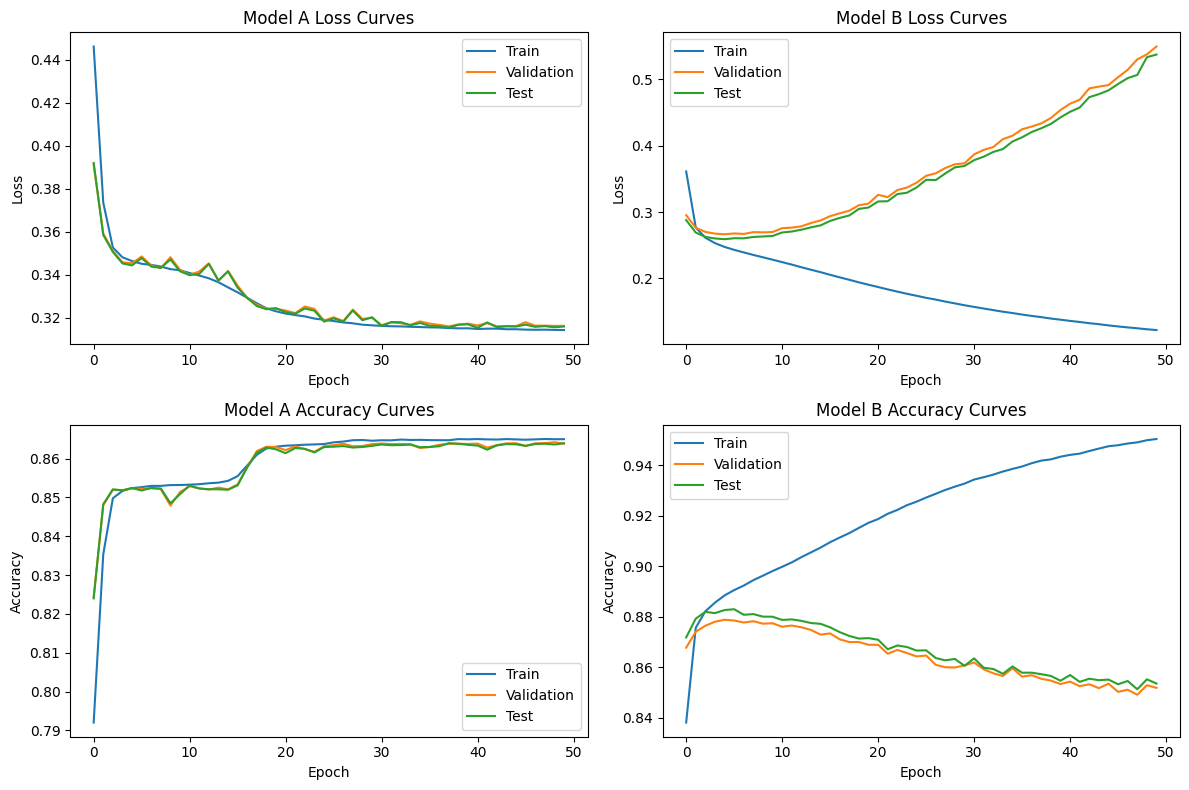

In [13]:
# Curvas de la loss function por epoch
plt.figure(figsize=(12, 8))  

# Modelo A
plt.subplot(2, 2, 1)
plt.plot(losses_train_a, label='Train')
plt.plot(val_losses_a, label='Validation')
plt.plot(test_losses_a, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model A Loss Curves')
plt.legend()

# Modelo B
plt.subplot(2, 2, 2)
plt.plot(losses_train, label='Train')
plt.plot(val_losses, label='Validation')
plt.plot(test_losses, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model B Loss Curves')
plt.legend()

# Curvas de accuracy por epoch

# Modelo A
plt.subplot(2, 2, 3)
plt.plot(accuracies_train_a, label='Train')
plt.plot(val_accuracies_a, label='Validation')
plt.plot(test_accuracies_a, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model A Accuracy Curves')
plt.legend()

# Modelo B
plt.subplot(2, 2, 4)
plt.plot(accuracies_train, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.plot(test_accuracies, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model B Accuracy Curves')
plt.legend()

plt.tight_layout()  # Ajusta el espaciado entre subgráficos
plt.show()  # Muestra el gráfico

Al analizar los dos modelos, se pueden observar patrones distintos en términos de su rendimiento a lo largo de las épocas y su capacidad de generalización.

El Modelo A exhibe un comportamiento donde las métricas accuracy para los conjuntos de entrenamiento, validación y prueba aumentan en conjunto a medida que avanzan las épocas. Este comportamiento indica que el modelo está aprendiendo de manera efectiva de los datos de entrenamiento y es capaz de generalizar bien a nuevos datos. Aunque existe una pequeña diferencia entre las accuracy en los conjuntos de entrenamiento y validación/prueba, esta diferencia no es significativa y sugiere un ajuste adecuado del modelo.

Por otro lado, el Modelo B presenta un comportamiento diferente. En las primeras épocas, la accuracy para los conjuntos de entrenamiento, validación y prueba aumentan en conjunto, pero pronto comienzan a divergir. La accuracy en el conjunto de entrenamiento continúa aumentando (incluso alcanzando niveles más altos que el Modelo A), lo que indica una adaptación a los datos de entrenamiento, mientras que la accuracy en los conjuntos de validación y prueba comienza a disminuir. Esta discrepancia sugiere que el Modelo B podría estar experimentando sobreajuste (overfitting), es decir, está memorizando los datos de entrenamiento en lugar de aprender patrones generales que se apliquen a nuevos datos. En consecuencia, aunque la accuracy en el conjunto de entrenamiento sigue mejorando, la capacidad del modelo para generalizar a datos no vistos se está deteriorando.

En conclusión, al comparar los dos modelos, el Modelo A muestra un comportamiento más deseable con una tendencia consistente de mejora en su accuracy a lo largo de las épocas y un buen nivel de generalización. Por otro lado, el Modelo B muestra signos de sobreajuste a medida que la accuracy en el conjunto de entrenamiento diverge de las accuracy en los conjuntos de validación y prueba, lo que puede resultar en un rendimiento subóptimo en datos no vistos. Al momento de elegir entre los dos modelos, es fundamental considerar tanto la accuracy como la capacidad de generalización y el riesgo de sobreajuste para seleccionar el modelo que mejor se adapte a los objetivos y requerimientos del problema en cuestión.